<a href="https://colab.research.google.com/github/Nanasei878/Maternal-Health-Risk-Evaluation/blob/main/Maternal_Health_Risk_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries for data analysis and visualization.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set()

In [56]:
#Load the dataset into a pandas DataFrame.
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [57]:
#View the first few rows of the dataset.
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
#Check the shape (rows and columns) of the dataset.
df.shape

(1014, 7)

In [ ]:
#Get detailed information about the dataset (data types, non-null counts).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#Check for missing values in the dataset
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
#Generate summary statistics for numerical
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
#Generate summary statistics for numerical categorical columns
df.describe(include='object')

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


In [ ]:
print(df.RiskLevel.value_counts(),"\n",
df.RiskLevel.value_counts(normalize=True))

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64 
 RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64


# Data Visualization

<Axes: title={'center': 'Pregnant women'}, xlabel='RiskLevel'>

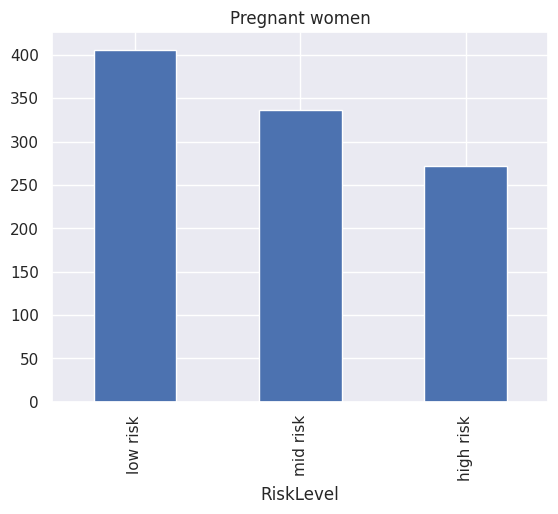

In [ ]:
df.RiskLevel.value_counts().plot.bar(title='Pregnant women')

**Observations**:
The bar chart shows that there are more pregnant women classified as low risk compared to mid risk and high risk.
Low risk: 406
Mid risk: 336
High risk: 272

In [82]:
def visualizer(numeric_feature, title, xlabel, ylabel):
    plt.figure(figsize=(16, 6))

    # Distribution plot
    plt.subplot(141)
    plt.title(title)
    sns.histplot(df[numeric_feature], kde=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Box plot
    plt.subplot(142)
    sns.boxplot(x=df[numeric_feature])

    # Box plot with risk levels
    plt.subplot(143)
    sns.boxplot(x=df.RiskLevel, y=df[numeric_feature])

    # Swarm plot with risk levels
    plt.subplot(144)
    sns.swarmplot(x=df.RiskLevel, y=df[numeric_feature])

    plt.show()

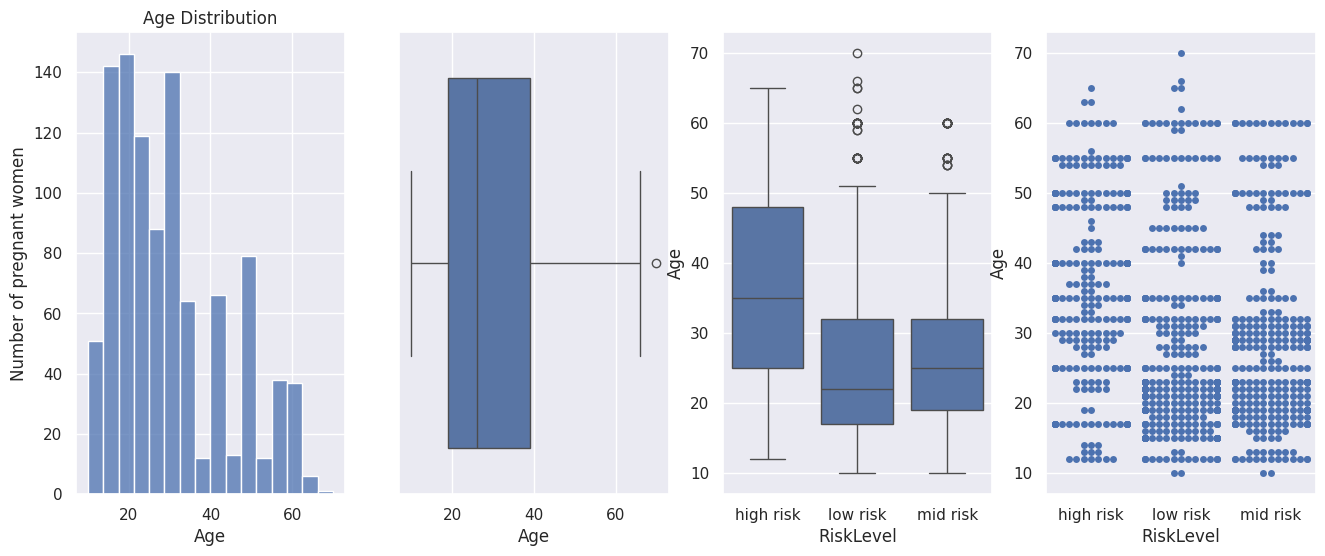

In [76]:
visualizer('Age','Age Distribution','Age','Number of pregnant women')

Age Distribution (Histogram):

Displays the distribution of ages of pregnant women in the dataset.
Shows that most pregnant women are between 20 and 30 years old.
Box Plot of Age:

Summarizes the age distribution through quartiles and identifies outliers.
Median age is around 25-30 years with a range extending from around 10 to 60 years.
Box Plot of Age by Risk Level:

Compares the age distributions across different risk levels (high risk, low risk, mid risk).
High risk group shows a higher median age than low and mid risk groups, with more outliers above 50 years old.
Swarm Plot of Age by Risk Level:

Visualizes individual age points grouped by risk level.
Similar pattern to the box plot, showing more older women in the high risk category and younger women in the low risk category.

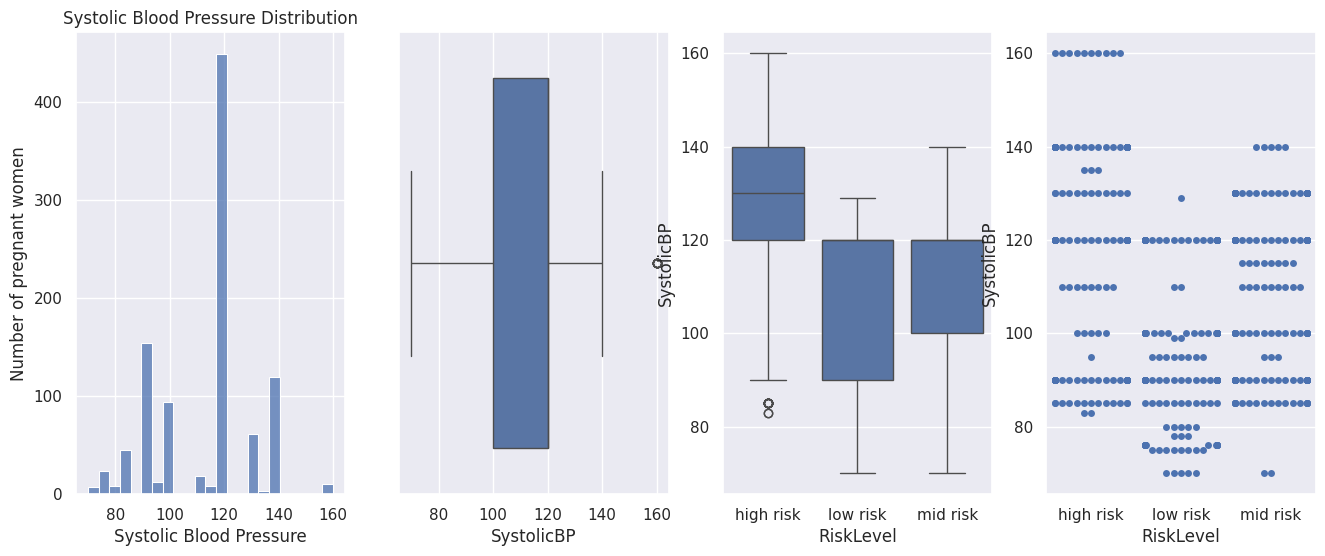

In [77]:
visualizer('SystolicBP', 'Systolic Blood Pressure Distribution', 'Systolic Blood Pressure', 'Number of pregnant women')

Distribution of Upper Value of Blood Pressure (Histogram):

Displays the distribution of systolic blood pressure values among pregnant women.
Shows a peak around 120 mmHg, indicating that most pregnant women have a systolic BP close to this value.
Box Plot of SystolicBP:

Summarizes the distribution of systolic BP through quartiles and identifies outliers.
Median systolic BP is around 120 mmHg with a range extending from around 80 to 160 mmHg.
Box Plot of SystolicBP by Risk Level:

Compares the systolic BP distributions across different risk levels (high risk, low risk, mid risk).
High risk group shows a higher median systolic BP compared to low and mid risk groups, with more variability in the high risk category.
Swarm Plot of SystolicBP by Risk Level:

Visualizes individual systolic BP values grouped by risk level.
Similar pattern to the box plot, showing higher systolic BP values in the high risk category.

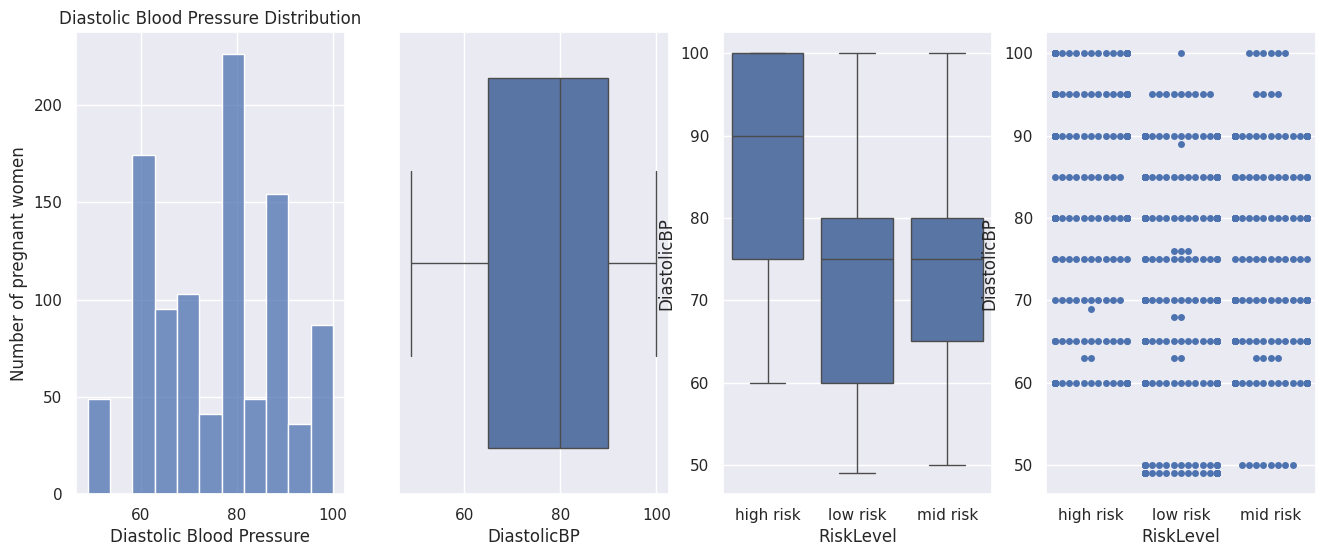

In [78]:
visualizer('DiastolicBP', 'Diastolic Blood Pressure Distribution', 'Diastolic Blood Pressure', 'Number of pregnant women')

Distribution of Lower Value of Blood Pressure (Histogram):

Displays the distribution of diastolic blood pressure values among pregnant women.
Shows a peak around 80 mmHg, indicating that most pregnant women have a diastolic BP close to this value.
Box Plot of DiastolicBP:

Summarizes the distribution of diastolic BP through quartiles and identifies outliers.
Median diastolic BP is around 80 mmHg with a range extending from around 50 to 100 mmHg.
Box Plot of DiastolicBP by Risk Level:

Compares the diastolic BP distributions across different risk levels (high risk, low risk, mid risk).
High risk group shows a higher median diastolic BP compared to low and mid risk groups, with more variability in the high risk category.
Swarm Plot of DiastolicBP by Risk Level:

Visualizes individual diastolic BP values grouped by risk level.
Similar pattern to the box plot, showing higher diastolic BP values in the high risk category.

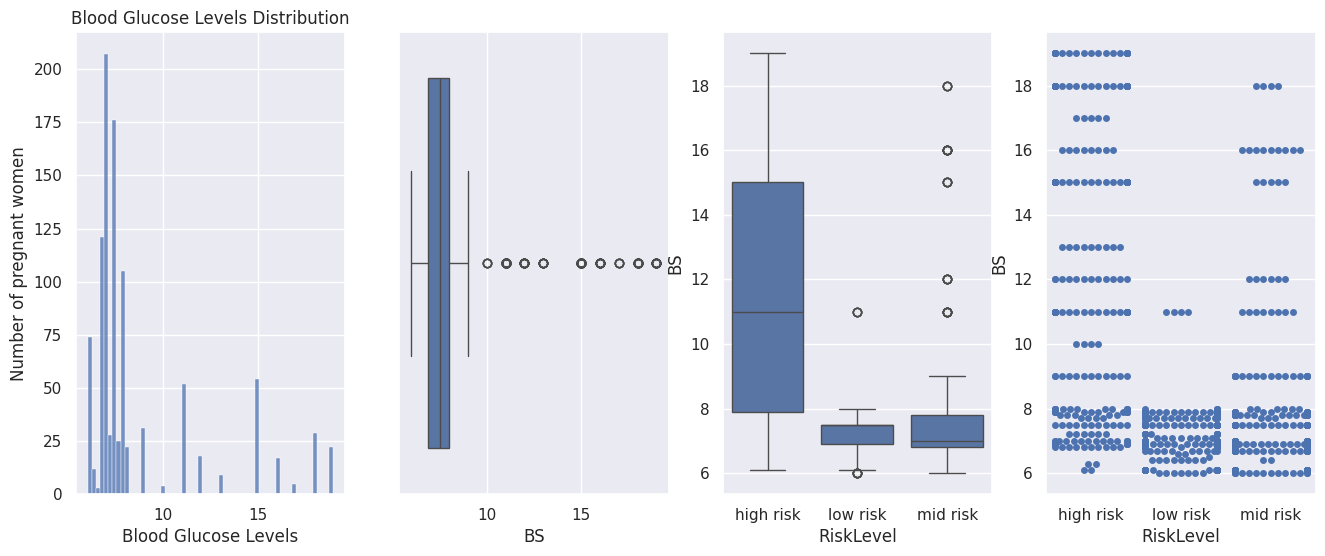

In [79]:
visualizer('BS', 'Blood Glucose Levels Distribution', 'Blood Glucose Levels', 'Number of pregnant women')

Distribution of Blood Glucose Levels (Histogram):

Displays the distribution of blood glucose levels among pregnant women.
Shows a peak around 8 mmol/L, indicating that most pregnant women have blood glucose levels close to this value.
Box Plot of Blood Glucose Levels:

Summarizes the distribution of blood glucose levels through quartiles and identifies outliers.
Median blood glucose level is around 8 mmol/L with a range extending from around 6 to 19 mmol/L.
Box Plot of Blood Glucose Levels by Risk Level:

Compares the blood glucose level distributions across different risk levels (high risk, low risk, mid risk).
High risk group shows a higher median blood glucose level compared to low and mid risk groups, with more outliers in the high risk category.
Swarm Plot of Blood Glucose Levels by Risk Level:

Visualizes individual blood glucose level values grouped by risk level.
Similar pattern to the box plot, showing higher blood glucose levels in the high risk category.

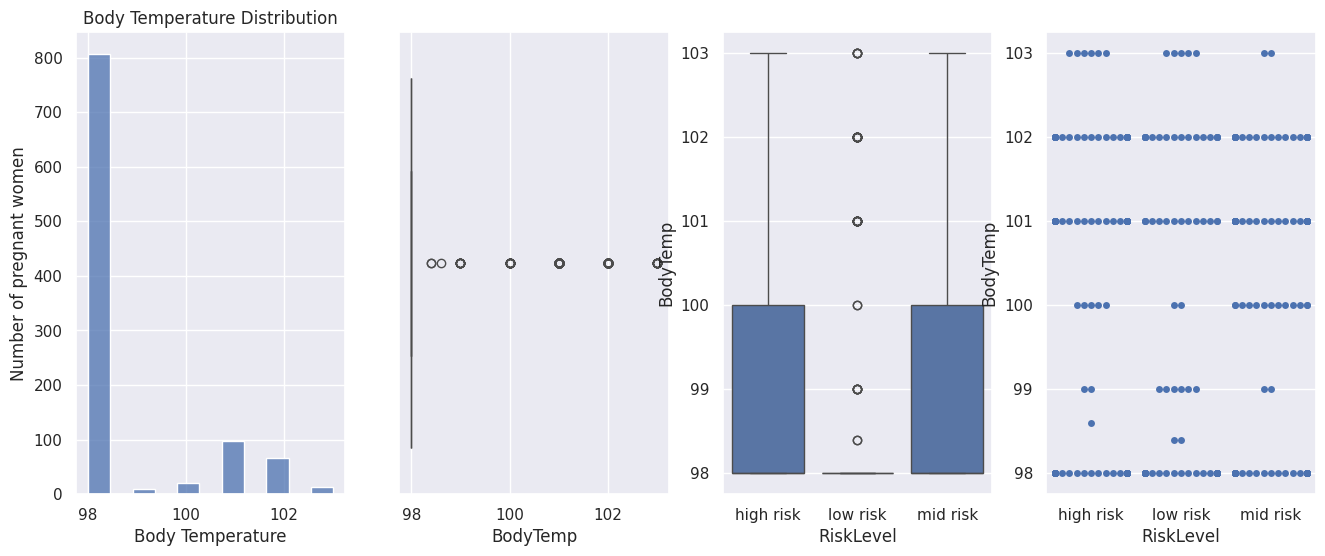

In [80]:
visualizer('BodyTemp', 'Body Temperature Distribution', 'Body Temperature', 'Number of pregnant women')

Body Temperature Distribution (Histogram):

Displays the distribution of body temperature values among pregnant women.
Shows a peak around 98 degrees Fahrenheit, indicating that most pregnant women have a body temperature close to this value.
Box Plot of Body Temperature:

Summarizes the distribution of body temperature through quartiles and identifies outliers.
Median body temperature is around 98 degrees Fahrenheit with a range extending from around 98 to 103 degrees Fahrenheit.
Box Plot of Body Temperature by Risk Level:

Compares the body temperature distributions across different risk levels (high risk, low risk, mid risk).
Body temperatures appear relatively consistent across all risk levels, with slight variations and outliers.
Swarm Plot of Body Temperature by Risk Level:

Visualizes individual body temperature values grouped by risk level.
Similar pattern to the box plot, showing consistent body temperatures across all risk categories.

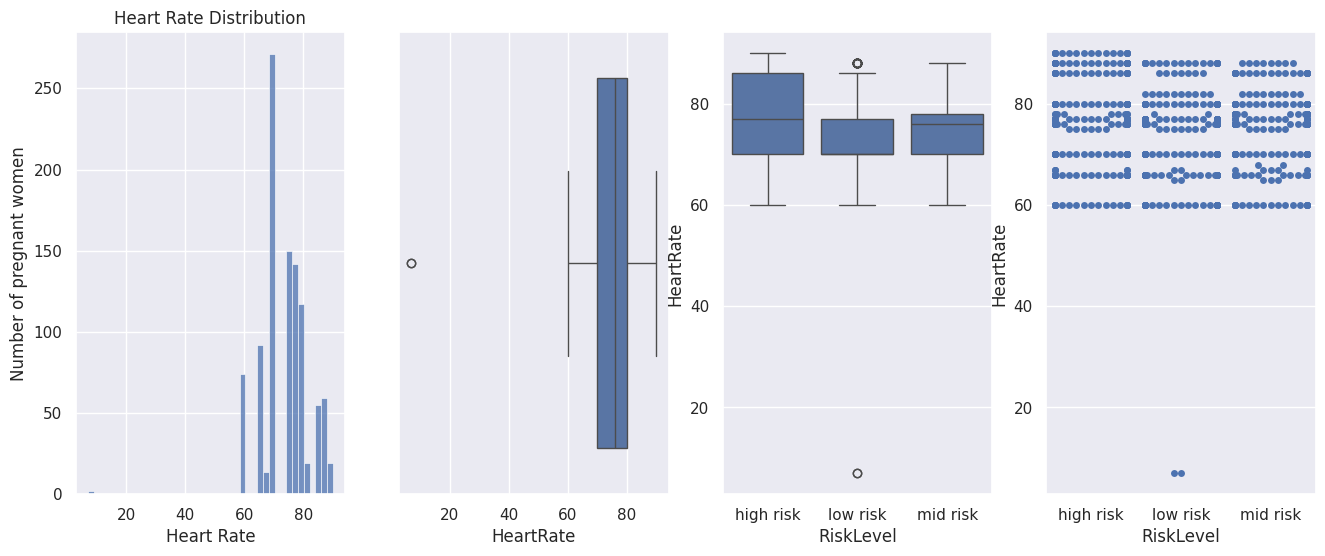

In [81]:
visualizer('HeartRate', 'Heart Rate Distribution', 'Heart Rate', 'Number of pregnant women')

Heart Rate Distribution (Histogram):

Displays the distribution of heart rate values among pregnant women.
Shows a peak around 70-80 beats per minute (bpm), indicating that most pregnant women have a heart rate within this range.
Box Plot of Heart Rate:

Summarizes the distribution of heart rate through quartiles and identifies outliers.
Median heart rate is around 75 bpm with a range extending from around 60 to 90 bpm.
Box Plot of Heart Rate by Risk Level:

Compares the heart rate distributions across different risk levels (high risk, low risk, mid risk).
High risk group shows a slightly higher median heart rate compared to low and mid risk groups, with some outliers in the high and low risk categories.
Swarm Plot of Heart Rate by Risk Level:

Visualizes individual heart rate values grouped by risk level.
Similar pattern to the box plot, showing heart rates are relatively consistent across all risk levels with some variability.

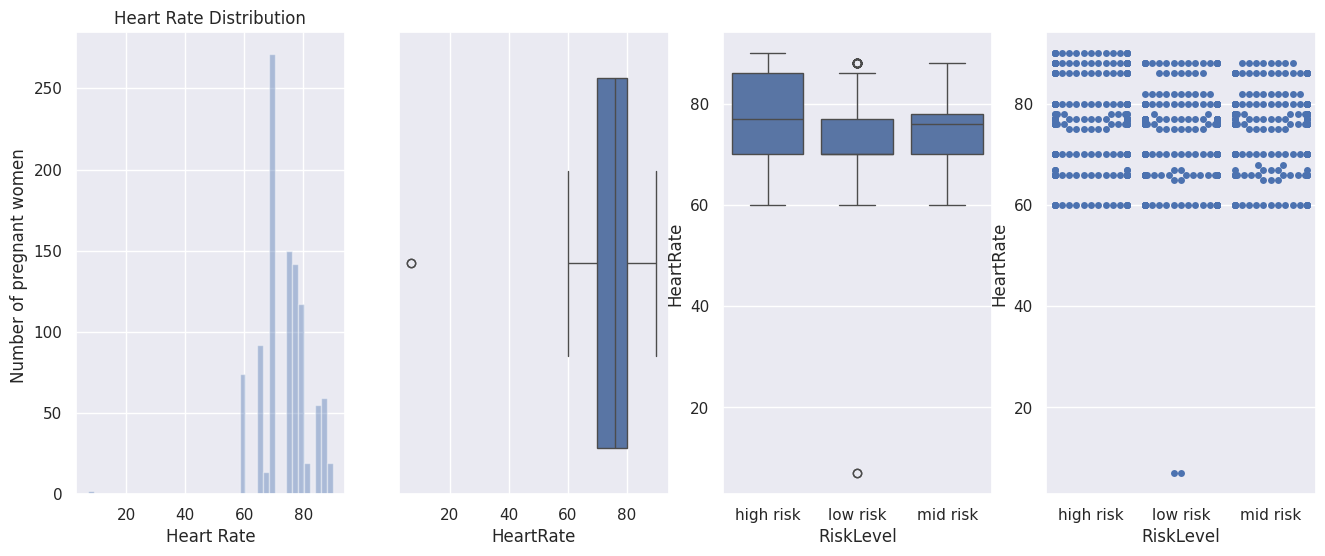

In [62]:
visualizer('HeartRate')

<Axes: >

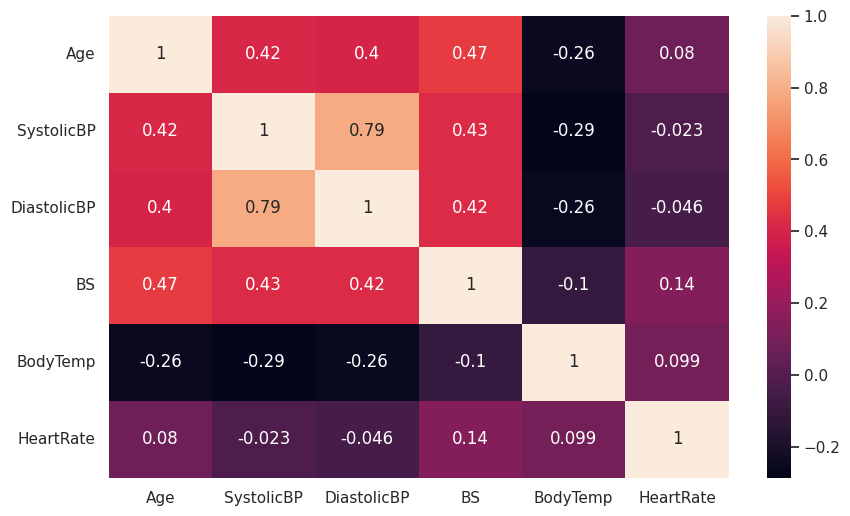

In [ ]:
the_corr = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(the_corr,annot=True)

Correlation Matrix:

The correlation matrix shows the Pearson correlation coefficients between pairs of variables. These coefficients range from -1 to 1, where:
1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.
Interpretation of Correlations:

Age:
Positively correlated with SystolicBP (0.42), DiastolicBP (0.40), and BS (0.47).
Negatively correlated with BodyTemp (-0.26).
SystolicBP (Systolic Blood Pressure):
Strongly positively correlated with DiastolicBP (0.79).
Positively correlated with BS (0.43).
Negatively correlated with BodyTemp (-0.29).
DiastolicBP (Diastolic Blood Pressure):
Strongly positively correlated with SystolicBP (0.79).
Positively correlated with BS (0.42).
Negatively correlated with BodyTemp (-0.26).
BS (Blood Glucose Levels):
Positively correlated with Age (0.47), SystolicBP (0.43), and DiastolicBP (0.42).
Negatively correlated with BodyTemp (-0.10).
Weakly positively correlated with HeartRate (0.14).
BodyTemp (Body Temperature):
Negatively correlated with Age (-0.26), SystolicBP (-0.29), and DiastolicBP (-0.26).
HeartRate:
Weakly correlated with all other variables, with the highest correlation being with BS (0.14).

<Figure size 1000x600 with 0 Axes>

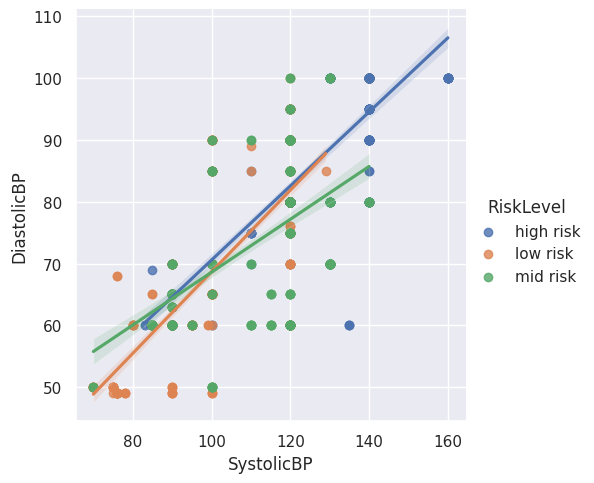

In [ ]:
df.columns
plt.figure(figsize=(10,6))
sns.lmplot(x="SystolicBP", y="DiastolicBP", hue="RiskLevel", data=df)

Exploration of the the relationship between 'SystolicBP' (Systolic Blood Pressure) and 'DiastolicBP' (Diastolic Blood Pressure), with points colored by 'RiskLevel'.

Scatter Plot:

Each point represents an observation (pregnant woman) in the dataset.
The x-axis shows the systolic blood pressure values.
The y-axis shows the diastolic blood pressure values.
Points are colored by 'RiskLevel':
Blue: High risk
Orange: Low risk
Green: Mid risk
Regression Lines:

Three regression lines are fitted, one for each risk level.
The regression lines show the general trend of the relationship between systolic and diastolic blood pressure for each risk category.
Observations:

There is a positive correlation between systolic and diastolic blood pressure across all risk levels, as indicated by the upward trend of the regression lines.
High-risk individuals (blue points) tend to have higher values for both systolic and diastolic blood pressure compared to mid-risk (green points) and low-risk (orange points) individuals.
The slope of the regression lines may differ slightly, indicating different rates of increase in diastolic BP with systolic BP across risk levels.
This plot effectively highlights the relationship between the two blood pressure measurements and how they vary with different risk levels.

# Feature Engineering

In [ ]:
#making copy of original dataframe
train_df = df.copy()

#Separating features (X) and target variable (y).
X = df.drop('RiskLevel',axis=1)
y = df.RiskLevel

In [ ]:
X.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70
1013,32,120,65,6.0,101.0,76


In [ ]:
#inspecting the splitted data
X.shape, y.shape

((1014, 6), (1014,))

In [ ]:
#LabelEncoder will be deployed to encode variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Split data for training & validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 1,stratify=y)

In [ ]:
#Standardizing the data to ensure all distributions are normal and also suppress outliers
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Train a Random Forest classifier on the training data.
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
#Predict the risk levels for the test data.
y_test_pred = model.predict(X_test)

In [ ]:
y_test_pred[0:5], y_test[0:5]

(array([1, 2, 1, 1, 1]), array([0, 2, 2, 1, 1]))

[[ 75   3   4]
 [  5 108   9]
 [  3  14  84]]


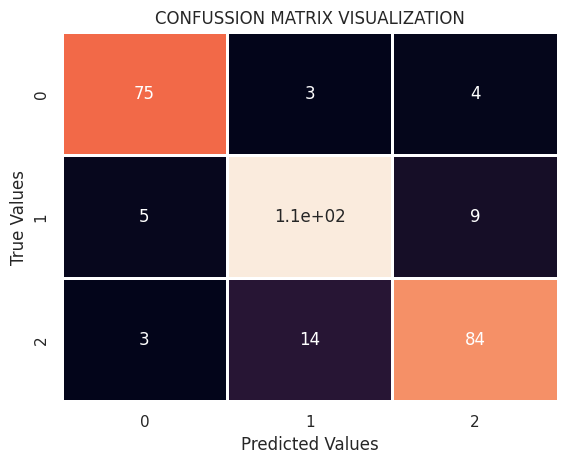

In [ ]:
print(confusion_matrix(y_test,y_test_pred))

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

The model predicts the low risk category with high accuracy (75 correct out of 82 actual low risk cases).

The mid risk category also shows strong predictive accuracy (110 correct out of 122 actual mid risk cases).

The high risk category has a good predictive accuracy (84 correct out of 101 actual high risk cases).

The confusion matrix suggests that the model performs well overall, with relatively few misclassifications.




In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.86      0.89      0.87       122
           2       0.87      0.83      0.85       101

    accuracy                           0.88       305
   macro avg       0.88      0.88      0.88       305
weighted avg       0.88      0.88      0.88       305



The model performs well across all classes, with high precision, recall, and F1-scores.

The model achieves a high overall accuracy of 0.88, indicating that it correctly predicts the risk level 88% of the time.

The macro average and weighted average metrics are consistent with the overall accuracy, further supporting the model’s reliability.

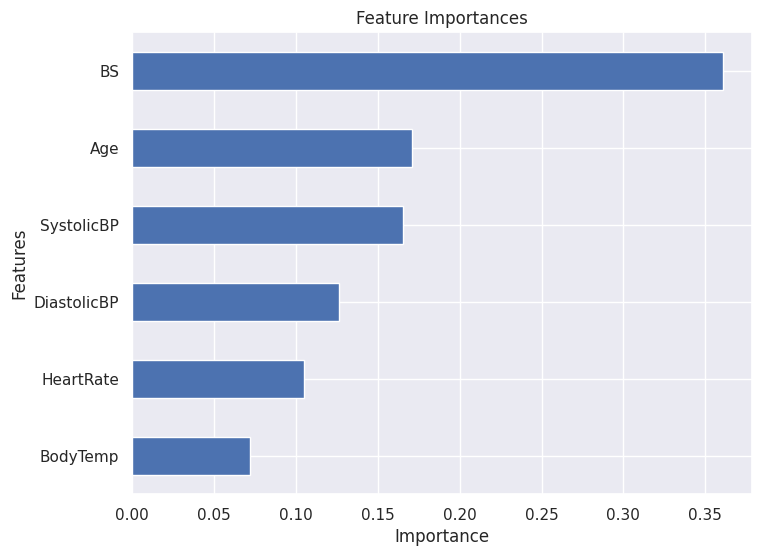

In [64]:
importances = pd.Series(model.feature_importances_, index=X.columns)
#  importances sorted by value in ascending order
importances = importances.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

BS (Blood Glucose Levels): This feature has the highest importance, indicating that blood glucose levels are a crucial factor in determining maternal health risk levels.

SystolicBP and Age: These features also significantly impact the model's predictions, highlighting the importance of blood pressure and age in assessing maternal health risks.

DiastolicBP, HeartRate, and BodyTemp: These features have lower importance but still contribute to the overall model, providing additional context and information for predictions.



In [65]:
#Boost for random forest
from sklearn.model_selection import GridSearchCV

In [66]:
#Using GridSearchCV to find the best parameters
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [67]:
# Fit the grid search model
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [68]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=61, random_state=1)

In [70]:
RFCmodel = RandomForestClassifier(max_depth=11, n_estimators=61, random_state=1)
RFCmodel.fit(X_train,y_train)

#Predict the risk levels for the test data.
y_test_predrfc = RFCmodel.predict(X_test)

[[ 75   3   4]
 [  5 105  12]
 [  3  24  74]]


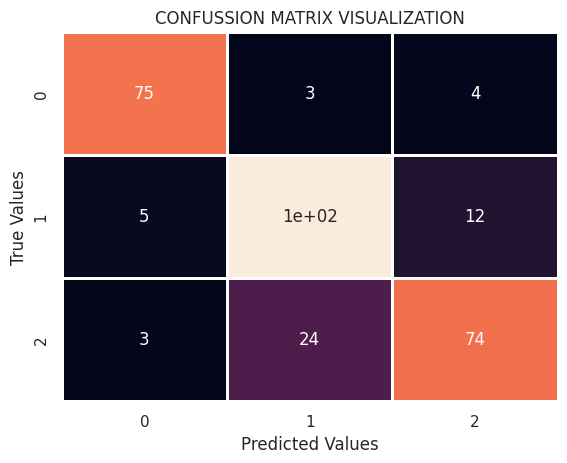

In [71]:
print(confusion_matrix(y_test,y_test_predrfc))

sns.heatmap(confusion_matrix(y_test,y_test_predrfc),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

The model predicts the low risk category with high accuracy (75 correct out of 82 actual low risk cases).

The mid risk category also shows strong predictive accuracy (100 correct out of 122 actual mid risk cases).

The high risk category has good predictive accuracy (74 correct out of 101 actual high risk cases).

The confusion matrix suggests that the model performs well overall, with relatively few misclassifications.

In [72]:
print(classification_report(y_test,y_test_predrfc))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.80      0.86      0.83       122
           2       0.82      0.73      0.77       101

    accuracy                           0.83       305
   macro avg       0.84      0.84      0.84       305
weighted avg       0.83      0.83      0.83       305



The overall accuracy of the model is 0.83, indicating that it correctly predicts the risk level 83% of the time.

The macro average and weighted average metrics are consistent with the overall accuracy, further supporting the model’s reliability.

The model performs best for the low risk category, followed by the mid risk category, and has the lowest performance for the high risk category.

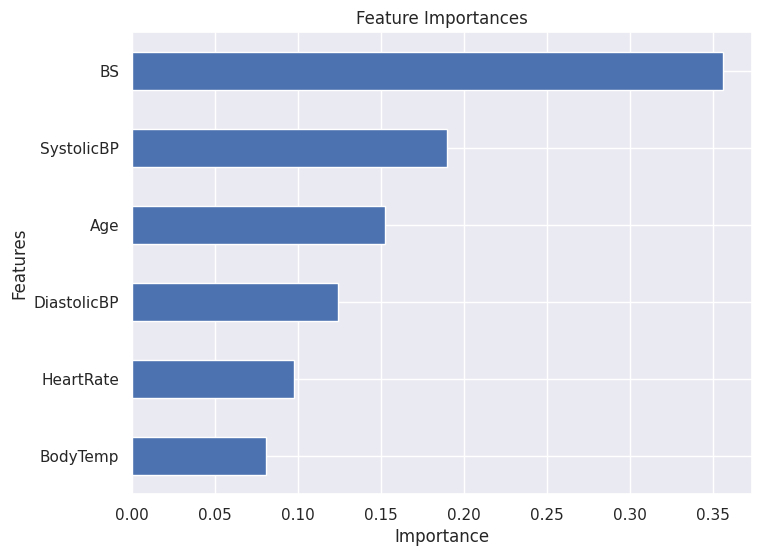

In [73]:
importances = pd.Series(RFCmodel.feature_importances_, index=X.columns)
#  importances sorted by value in ascending order
importances = importances.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Same observation was seen in the initial model.

**Summary**

Accuracy: The first model has a higher overall accuracy (0.88) compared to the optimized model (0.83).

Precision and Recall:
The first model has consistently higher precision, recall, and F1-scores across all classes.

The optimized model shows a decrease in performance metrics, particularly for the mid and high risk categories.

Macro and Weighted Averages: The first model has better macro and weighted averages for precision, recall, and F1-score compared to the optimized model.


**Conclusion**

The initial model performed better across all key metrics compared to the optimized model. The GridSearchCV optimization did not improve the model's performance and actually resulted in lower precision, recall, and F1-scores. This suggests that the initial hyperparameters were already well-suited for the task, or that the chosen grid search parameters and ranges were not optimal.

Blood glucose levels (BS) and systolic blood pressure (SystolicBP) are the top contributors, followed by age. This information can be valuable for focusing on key health metrics in maternal health risk assessments and potentially guiding clinical practices.